# Pulsating Aurora

This notebook will run the ISR simulator with plasma state parameters that occur during pulsating aurora.  

## Import Stuff

Mainly import matplotlib, scipy and other packages for processing and plotting. Along with functions from the SimISR module.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
#SimISR packages
from SimISR import Path
from SimISR.utilFunctions import readconfigfile,makeconfigfile
from SimISR.runsim import main as runsim 
from SimISR.IonoContainer import IonoContainer,MakeTestIonoclass
from SimISR.analysisplots import analysisdump

## Input Parameter Set Up

The following cell will set up the pulsating aurora input plasma parameters. The model of the parameters will be Ne(1+ehn_lev*sin(2*pi*t/PT))

In [2]:
# Pulsating aurora parameters
PT=30.# the period of pulsation in seconds.
ehn_lev=2. # level of enhancement.
pa_range=[250.,300.]# range of pulsation along altitude in km

# set up the time and space vectors
dt=1.
timevec=sp.arange(120.)*dt
timemat=sp.column_stack((timevec,(timevec/dt+1)*dt))
z = (50.+sp.arange(120)*5.)
nz = len(z)
coords = sp.column_stack((sp.zeros((nz,2)),z))
# Create the weighting for the pulsation
logar=sp.logical_and((z>=pa_range[0]),(z<pa_range[1]))
PA_weight=1+.5*(ehn_lev-1)*(1-sp.cos(2.*sp.pi*timevec/PT))
PA_weight_rep = sp.tile(PA_weight[sp.newaxis,:],[logar.sum(),1])

# Make a set of input parameters with a electron density modeled by a Chapman function and an electron and ion temperature
# modeled as shifted and scalled atan functions.
Icont1=MakeTestIonoclass(testv=False,testtemp=True,N_0=1e11,z_0=250.0,H_0=50.0,coords=coords,times=timemat)
# Apply windowing to the electron density 
Icont1.Param_List[logar,:,-1,0]=PA_weight_rep*Icont1.Param_List[logar,:,-1,0]

# Create the starting point data for the fitter.
Icontstart = MakeTestIonoclass(testv=False,testtemp=False,N_0=1e11,z_0=250.0,H_0=50.0,
                               coords=coords,times =sp.array([[0,1e6]]))

## Set up for Simulation

Set up parameters for simulation like pulse length, pulse type, beam positions, etc. Also create a file structure to save the data at the different levels.

In [7]:
# Make file tree if not already inplace.
curloc = Path.cwd()
testpath = curloc.parent.joinpath('Testdata','PulsatingNotebook')
testpath.mkdir(exist_ok=True,parents=True)
# Read in default config file.
defaultpath = curloc.parent.joinpath('Test')
defcon = defaultpath.joinpath('statsbase.yml')
(sensdict,simparams) = readconfigfile(str(defcon))

# Adjust config file for specific case.
simparams['Beamlist']=[64016.0]
tint = 10.
ratio1 = tint/simparams['Tint']
simparams['Tint']=ratio1 * simparams['Tint']
simparams['Fitinter'] = ratio1 * simparams['Fitinter']
simparams['TimeLim'] = tint+timevec[-1]
# Save configuration file.
simparams['startfile']='startfile.h5'
makeconfigfile(str(testpath.joinpath('stats.yml')),simparams['Beamlist'],sensdict['Name'],simparams)
# Save out input plasma parameters
finalpath = testpath.joinpath('Origparams')
finalpath.mkdir(exist_ok=True,parents=True)
finalfile = finalpath.joinpath('0 stats.h5')
Icont1.saveh5(str(finalfile))
Icontstart.saveh5(str(testpath.joinpath('startfile.h5')))

## Run SimISR

In [11]:
functlist = ['spectrums','radardata','fitting']

config = str(testpath.joinpath('stats.yml'))

runsim(functlist,testpath,config,True,printlines=False)

Percent: [--------------------] 0.0% Processing file 0 stats.h5 starting at 2018-07-23 12:16:21.215156
Percent: [####################] 100.0% Done...
Finished file 0 stats.h5 starting at 2018-07-23 12:16:52.216206
All spectrums created already

Data Now being created.
Percent: [--------------------] 0.0% Data from 0 of 1 being processed Name: 0.0 spectrum.h5.


/Users/swoboj/Documents/Python/PythonISRUtilities/isrutilities/mathutils.py:25: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(n*x/2) / (n*np.sin(x/2))


Forming ACF estimates
Percent: [--------------------] 0.0% Time 0 of 13
Percent: [--------------------] 0.0% Beam 0 of 1
Percent: [##------------------] 7.69230769231% Time 1 of 13
Percent: [##------------------] 7.69230769231% Beam 0 of 1
Percent: [###-----------------] 15.3846153846% Time 2 of 13
Percent: [###-----------------] 15.3846153846% Beam 0 of 1
Percent: [#####---------------] 23.0769230769% Time 3 of 13
Percent: [#####---------------] 23.0769230769% Beam 0 of 1
Percent: [######--------------] 30.7692307692% Time 4 of 13
Percent: [######--------------] 30.7692307692% Beam 0 of 1
Percent: [########------------] 38.4615384615% Time 5 of 13
Percent: [########------------] 38.4615384615% Beam 0 of 1
Percent: [#########-----------] 46.1538461538% Time 6 of 13
Percent: [#########-----------] 46.1538461538% Beam 0 of 1
Percent: [###########---------] 53.8461538462% Time 7 of 13
Percent: [###########---------] 53.8461538462% Beam 0 of 1
Percent: [############--------] 61.5384615385%

/Users/swoboj/Documents/Python/SimISR/SimISR/specfunctions.py:154: RuntimeWarning: overflow encountered in exp
  grt0 = np.exp(-datablock)
/Users/swoboj/Documents/Python/ISRSpectrum/ISRSpectrum/ISRSpectrum.py:397: ComplexWarning: Casting complex values to real discards the imaginary part
  nuperp[-1] = nuei +nuee
/Users/swoboj/Documents/Python/ISRSpectrum/ISRSpectrum/ISRSpectrum.py:398: ComplexWarning: Casting complex values to real discards the imaginary part
  nuparr[-1] = nuei
/Users/swoboj/Documents/Python/ISRSpectrum/ISRSpectrum/ISRSpectrum.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  nuparr[si]=nuparr[si]+Bst[s][t]*Ni[ti]/sp.power(Ti[ti],1.5)
/Users/swoboj/Documents/Python/SimISR/SimISR/specfunctions.py:170: RuntimeWarning: invalid value encountered in divide
  guess_acf = guess_acf*rcs/guess_acf[0].real
/Users/swoboj/Documents/Python/SimISR/SimISR/fitterMethodGen.py:210: ComplexWarning: Casting complex values to real discards the imaginary

False

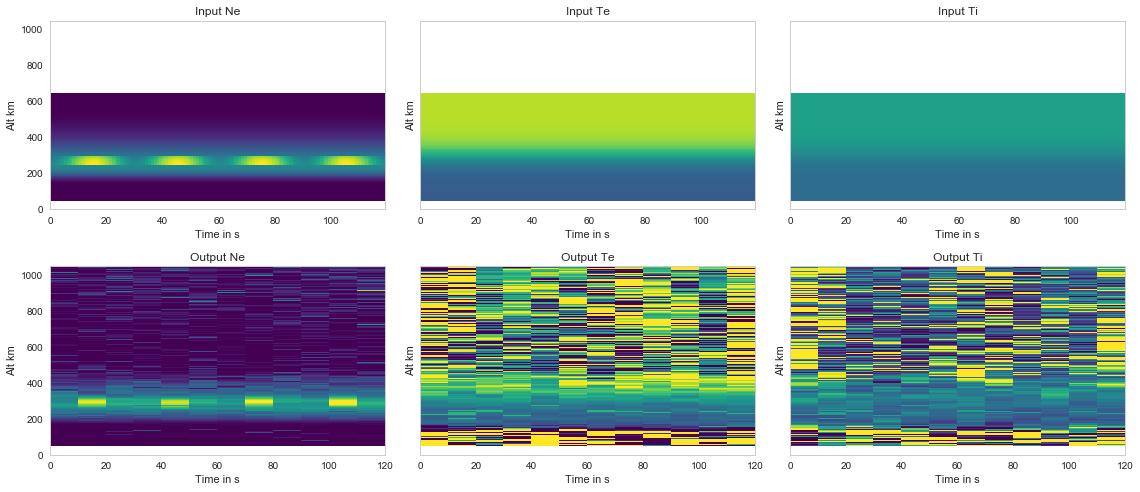

In [25]:
sns.set_style("whitegrid")
sns.set_context("notebook")
fig1,axmat =plt.subplots(2,3,figsize = (16,7),sharey=True)
axvec = axmat.flatten()
fittedfile =testpath.joinpath('Fitted','fitteddata.h5')
fitiono = IonoContainer.readh5(str(fittedfile))
paramlist = ['Ne','Te','Ti']
indlist =[sp.argwhere(ip==fitiono.Param_Names)[0][0] for ip in paramlist]
n_indlist =[sp.argwhere(('n'+ip)==fitiono.Param_Names)[0][0] for ip in paramlist]


Tmat_in, Amat_in =sp.meshgrid(timevec,z)
altin =Icont1.Cart_Coords[:,2]
tout=fitiono.Time_Vector[:,0]
altfit = fitiono.Cart_Coords[:,2]

Tmat_out, Amat_out =sp.meshgrid(tout,altfit)

in_ind=[[1,0],[1,1],[0,1]]
pbounds = [[1e10,2e11],[200.,3000.],[200.,2500.],[-100.,100.]]
for i in range(len(paramlist)):
    iax=axmat[0,i]
    iaxo=axmat[1,i]
    iinind = in_ind[i]
    ifitind = indlist[i]
    #plot input
    curin = Icont1.Param_List[:,:,iinind[0],iinind[1]]
    image_in = iax.pcolor(Tmat_in,Amat_in,curin,cmap='viridis',vmin=pbounds[i][0],vmax=pbounds[i][1])
    iax.set_xlabel("Time in s")
    iax.set_ylabel('Alt km')
    iax.set_title('Input ' +paramlist[i])
    #plot fitted data
    fitdata = fitiono.Param_List[:,:,ifitind].real
    image_out = iaxo.pcolor(Tmat_out,Amat_out,fitdata,cmap='viridis',vmin=pbounds[i][0],vmax=pbounds[i][1])
    iaxo.set_xlabel("Time in s")
    iaxo.set_ylabel('Alt km')
    iaxo.set_title('Output ' +paramlist[i])
    plt.tight_layout()